<a href="https://colab.research.google.com/github/SaifBhuiya/Depth/blob/main/Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64

# Function to open the webcam and capture frames
def open_webcam():
    js = Javascript('''
    async function openWebcam() {
        const video = document.createElement('video');
        const canvas = document.createElement('canvas');
        const ctx = canvas.getContext('2d');

        const displayCanvas = document.createElement('canvas'); // Canvas for displaying the captured frames
        const displayCtx = displayCanvas.getContext('2d');

        video.style.display = 'none'; // Hide the video element
        canvas.style.display = 'none'; // Hide the canvas drawing the webcam feed
        displayCanvas.style.display = 'block'; // Make the second canvas visible

        video.width = 640;
        video.height = 480;
        canvas.width = 640;
        canvas.height = 480;
        displayCanvas.width = 640;
        displayCanvas.height = 480;

        try {
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(canvas); // Append the canvas for webcam feed
            document.body.appendChild(displayCanvas); // Append the canvas to display captured frames

            video.srcObject = stream;
            await video.play();

            // Function to draw video frames on canvas
            function drawFrame() {
                ctx.drawImage(video, 0, 0, canvas.width, canvas.height); // Draw webcam feed on the first canvas
                requestAnimationFrame(drawFrame); // Continuously capture and draw
            }
            drawFrame();

            // Function to capture the frame from the first canvas and display on second canvas
            function captureFrame() {
                displayCtx.clearRect(0, 0, displayCanvas.width, displayCanvas.height); // Clear display canvas
                displayCtx.drawImage(canvas, 0, 0, displayCanvas.width, displayCanvas.height); // Draw captured frame to second canvas
                 // Convert the content of the displayCanvas to a PNG image as base64
                const imageData = displayCanvas.toDataURL('image/png');
            }

            // Capture frame every 100ms (adjust as needed)
            setInterval(captureFrame, 100);

        } catch (e) {
            console.error('Error accessing webcam:', e);
        }
    }
    ''')

    display(js)
    eval_js('openWebcam()')

# Start webcam stream
open_webcam()


<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
from gradio_client import Client, handle_file

client = Client("Albert-NHWang/Depth-Anywhere-App")
result = client.predict(
		path=handle_file('/content/1701257549611.jpg'),
		api_name="/depth"
)
print(result)

Loaded as API: https://albert-nhwang-depth-anywhere-app.hf.space ✔
/tmp/gradio/089f5ca1b7995dd6881c72c75ea0efe479b2bb2af5adfb30620121e176bf21e4/image.webp


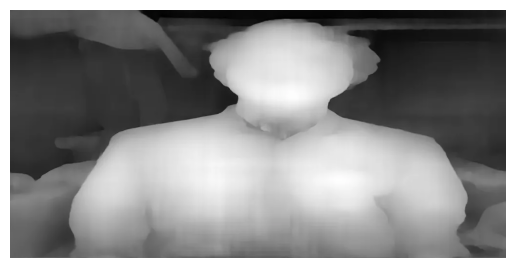

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_path = result

# Try reading the WebP image
image = cv2.imread(file_path)

if image is None:
    print("Error: Could not load the image. It might be corrupted or not a valid WebP file.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    plt.imshow(image)
    plt.axis("off")
    plt.show()
